# Stance Visualization

Reproducing the work from https://github.com/uclmr/fakenewschallenge

1. Reproduce the training
2. Feed the BoW to t-SNE


In [91]:
# Import relevant packages and modules
from util import *
import time
import random
import keras
from sklearn.manifold import TSNE
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Initialise hyperparameters
rand_seed = 1
lim_unigram = 5000
target_size = 4
hidden_size = 100
train_keep_prob = 0.6
l2_alpha = 0.00001
learn_rate = 0.01
clip_ratio = 5
batch_size_train = 500
epochs = 90

In [12]:
# Set file names
file_train_instances = "./data/train_stances.csv"
file_train_bodies = "./data/train_bodies.csv"
file_test_instances = "./data/test_stances_unlabeled.csv"
file_test_bodies = "./data/test_bodies.csv"
file_predictions = 'predictions_test.csv'

In [16]:
dic = load_data(file_train_instances=file_train_instances
                ,file_train_bodies=file_train_bodies
                ,file_test_instances=file_test_instances
                ,file_test_bodies=file_test_bodies
                ,lim_unigram=lim_unigram
                ,random_seed = rand_seed)

Raw data loaded.... number of data points = 49972
Initial setup for training dataset complete....
Finished setting up training set. Number of train/dev/test data points = 39977/9995/25413


In [89]:
%time
start = time.time()
t_sne = TSNE(n_components=2)
t_sne.set_params(n_components=2, perplexity=50.0, early_exaggeration=12.0
               , learning_rate=300.0, n_iter=500, n_iter_without_progress=100
               , min_grad_norm=1e-07
               , metric='euclidean', init='random', verbose=0
               , random_state=None, method='barnes_hut', angle=0.5)
npts = 2000
X_embedded = dic['train_x'][:npts,:]
Y_embedded = dic['train_y'][:npts,:].argmax(axis=1)
X_embedded = t_sne.fit_transform(X_embedded)
end = time.time()
print('Time spent = %f')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


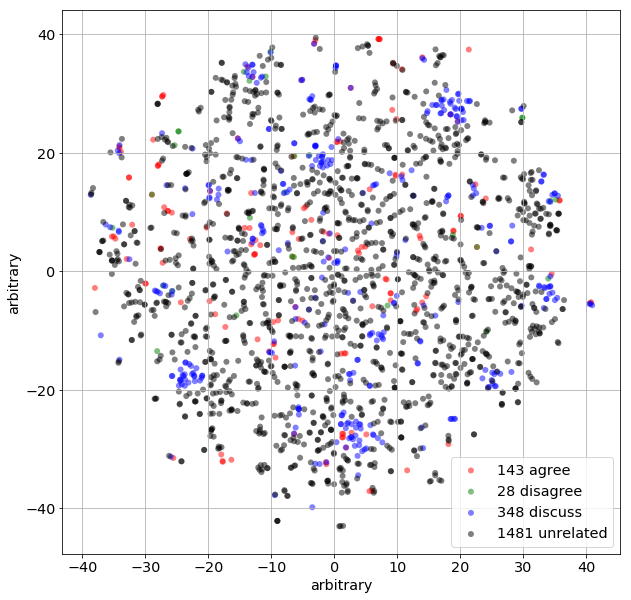

In [90]:
plot_tsne_scattering(X_embedded, Y_embedded, label_ref_rev)